In [26]:
import pandas as pd

# CSV 파일에서 데이터 읽기
df1 = pd.read_csv('Astar_results_dir/ByAstar_Rho_version_H3_Omega_20231204_101344.csv')
df2 = pd.read_csv('Astar_results_dir/ByAstar_Rho_version_H3_Omega_20231204_101435.csv')
df3 = pd.read_csv('Astar_results_dir/ByAstar_Rho_version_H3_Omega_20231204_101553.csv')

# df4 = pd.read_csv('../../Data/using/dt_2.6/ByAstar_dt_2.6_1016.csv')
df5 = pd.read_csv('Astar_results_dir/ByAstar_Rho_version_H3_Omega_20231213_145337.csv')
df6 = pd.read_csv('Astar_results_dir/ByAstar_Rho_version_H3_Omega_20231213_145409.csv')
df7 = pd.read_csv('Astar_results_dir/ByAstar_Rho_version_H3_Omega_20231213_145433.csv')
# df8 = pd.read_csv('Astar_results_dir/ByAstar_dt_2.6_part_20231006_175318.csv')

df = pd.concat([df1,df2,df3,df5,df6,df7])
# df = pd.concat([df4])

df.info()
# df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 2278 entries, 0 to 264
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Case            2278 non-null   object 
 1   gate length     2278 non-null   int64  
 2   Theta           2278 non-null   float64
 3   Phi             2278 non-null   float64
 4   Omega           2278 non-null   float64
 5   dt              2278 non-null   float64
 6   combination     2278 non-null   object 
 7   total time      2278 non-null   float64
 8   computing time  2278 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 178.0+ KB


array([[<Axes: title={'center': 'gate length'}>,
        <Axes: title={'center': 'Theta'}>,
        <Axes: title={'center': 'Phi'}>],
       [<Axes: title={'center': 'Omega'}>,
        <Axes: title={'center': 'dt'}>,
        <Axes: title={'center': 'total time'}>],
       [<Axes: title={'center': 'computing time'}>, <Axes: >, <Axes: >]],
      dtype=object)

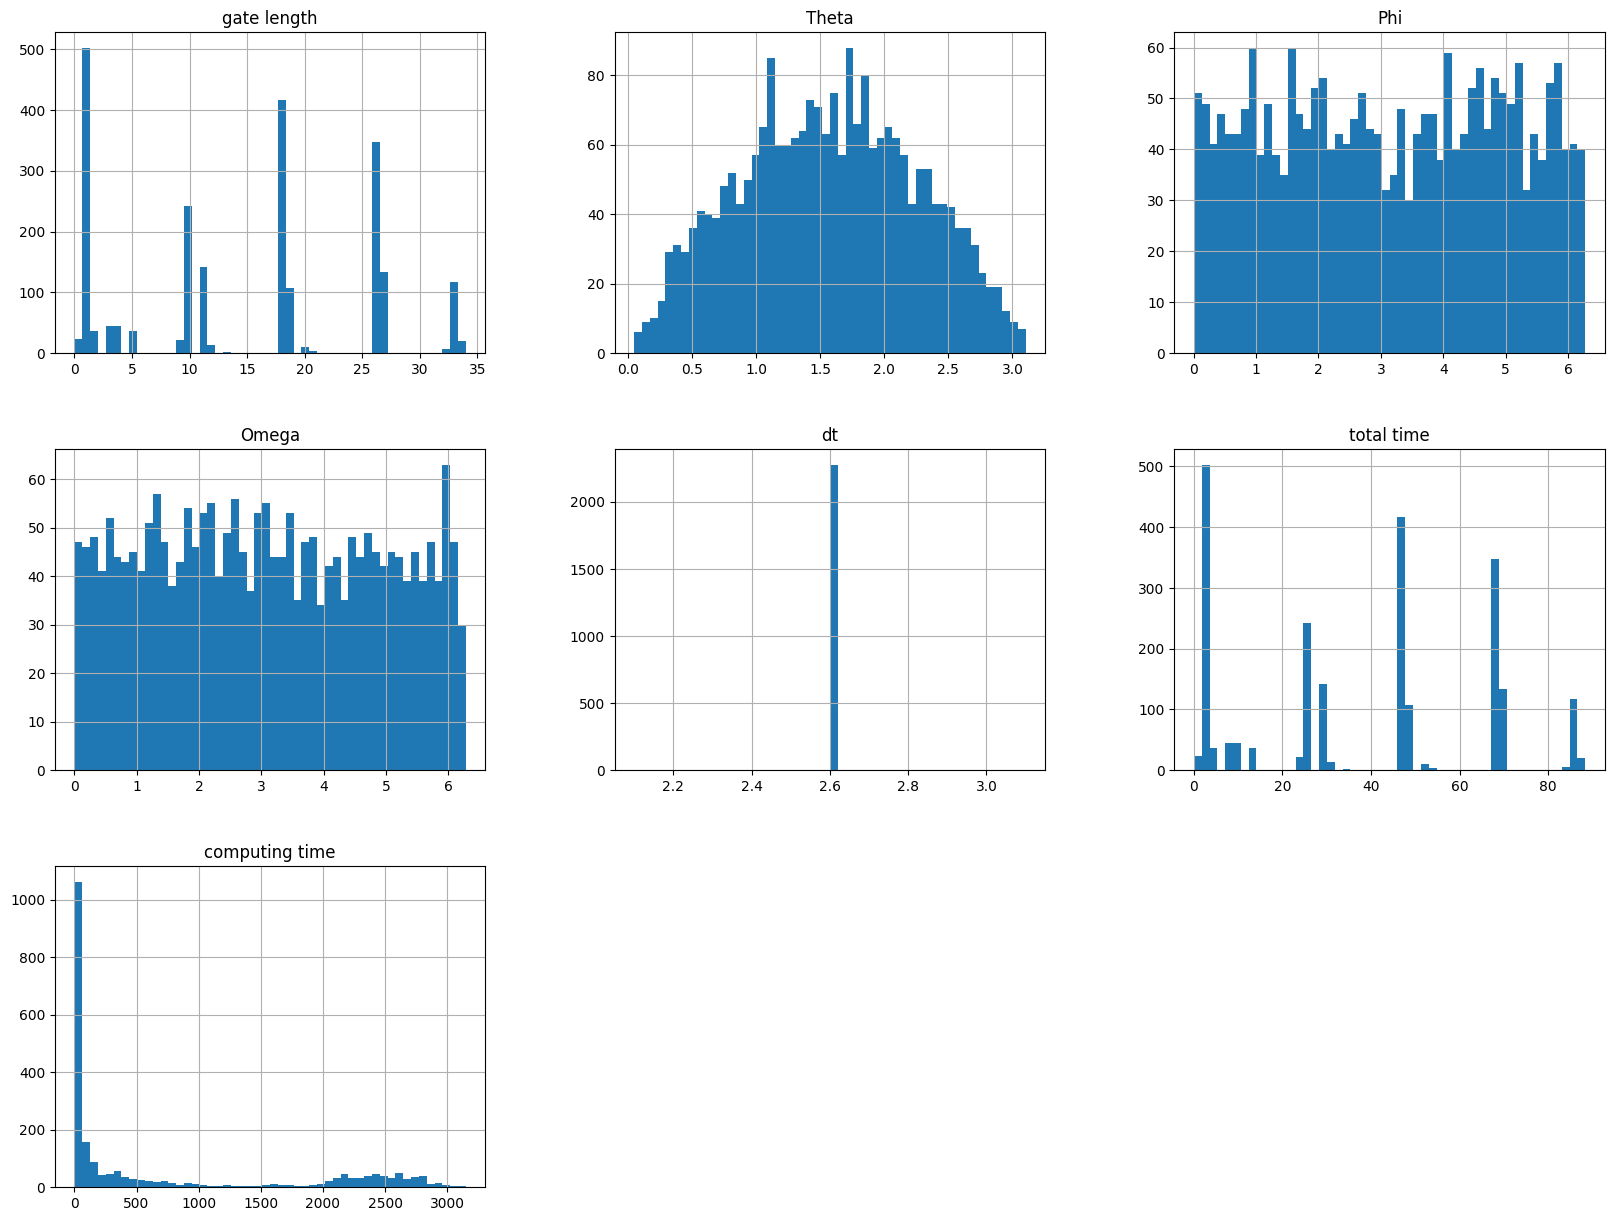

In [27]:
import matplotlib as plt

%matplotlib inline
df.hist(bins=50, figsize=(20,15))

# 히스토그램(주어진 값 범위 수평축, 샘플 수 수직축)

<Axes: xlabel='Theta', ylabel='Phi'>

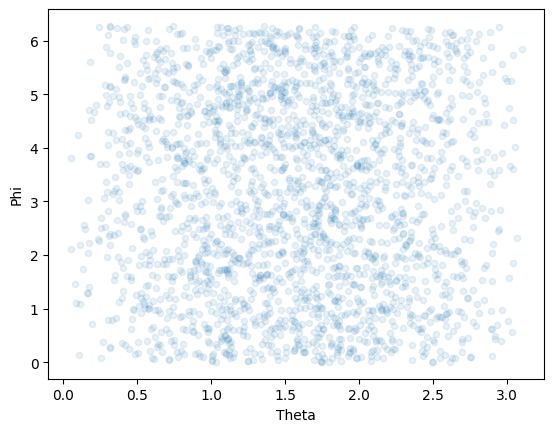

In [28]:
df.plot(kind = "scatter", x="Theta", y="Phi", alpha=0.1)

<class 'pandas.core.frame.DataFrame'>
Index: 494 entries, 9 to 263
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Case            494 non-null    object 
 1   gate length     494 non-null    int64  
 2   Theta           494 non-null    float64
 3   Phi             494 non-null    float64
 4   Omega           494 non-null    float64
 5   dt              494 non-null    float64
 6   combination     494 non-null    object 
 7   total time      494 non-null    float64
 8   computing time  494 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 38.6+ KB


<Axes: xlabel='Theta', ylabel='Phi'>

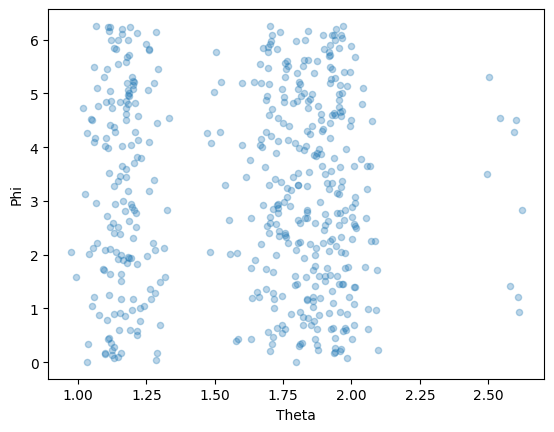

In [29]:
df_min1 = df[df['combination'] == '[-1]']

df_min1.info()

df_min1.plot(kind = "scatter", x="Theta", y="Phi", alpha=0.3)

<class 'pandas.core.frame.DataFrame'>
Index: 1784 entries, 0 to 264
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Case            1784 non-null   object 
 1   gate length     1784 non-null   int64  
 2   Theta           1784 non-null   float64
 3   Phi             1784 non-null   float64
 4   Omega           1784 non-null   float64
 5   dt              1784 non-null   float64
 6   combination     1784 non-null   object 
 7   total time      1784 non-null   float64
 8   computing time  1784 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 139.4+ KB


<Axes: xlabel='Theta', ylabel='Phi'>

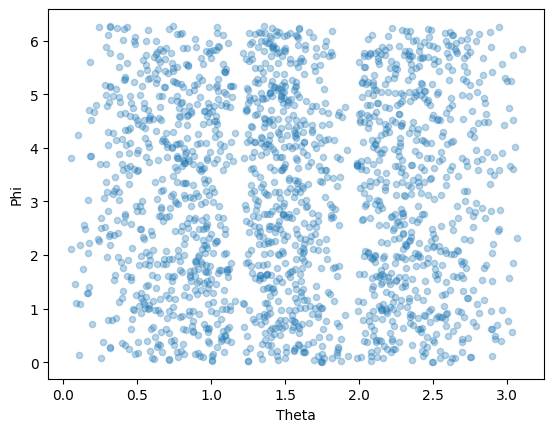

In [30]:
df_non_min1 = df[df['combination'] != '[-1]']

df_non_min1.info()

df_non_min1.plot(kind = "scatter", x="Theta", y="Phi", alpha=0.3)

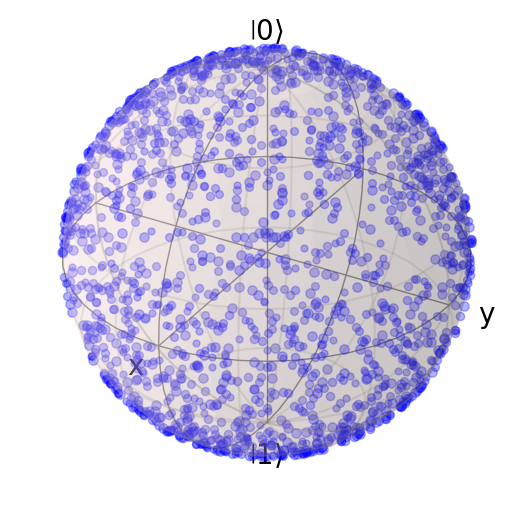

In [31]:
from qutip import *
import numpy as np

b = Bloch()
point_list = []

for index, row in df_non_min1.iterrows():
    
    t, p = row['Theta'], row['Phi']  
    
    point = [np.sin(t) * np.cos(p),
             np.sin(t) * np.sin(p),
             np.cos(t)]
    
    b.add_points(point, 'm', alpha=0.3)
    # print(point)
    point_list.append(point)

b.point_marker = ['o']
b.show()

In [32]:
import matplotlib as plt

%matplotlib inline
df_min1.hist(bins=50, figsize=(20,15))

# 히스토그램(주어진 값 범위 수평축, 샘플 수 수직축)

array([[<Axes: title={'center': 'gate length'}>,
        <Axes: title={'center': 'Theta'}>,
        <Axes: title={'center': 'Phi'}>],
       [<Axes: title={'center': 'Omega'}>,
        <Axes: title={'center': 'dt'}>,
        <Axes: title={'center': 'total time'}>],
       [<Axes: title={'center': 'computing time'}>, <Axes: >, <Axes: >]],
      dtype=object)

array([[<Axes: title={'center': 'gate length'}>,
        <Axes: title={'center': 'Theta'}>,
        <Axes: title={'center': 'Phi'}>],
       [<Axes: title={'center': 'Omega'}>,
        <Axes: title={'center': 'dt'}>,
        <Axes: title={'center': 'total time'}>],
       [<Axes: title={'center': 'computing time'}>, <Axes: >, <Axes: >]],
      dtype=object)

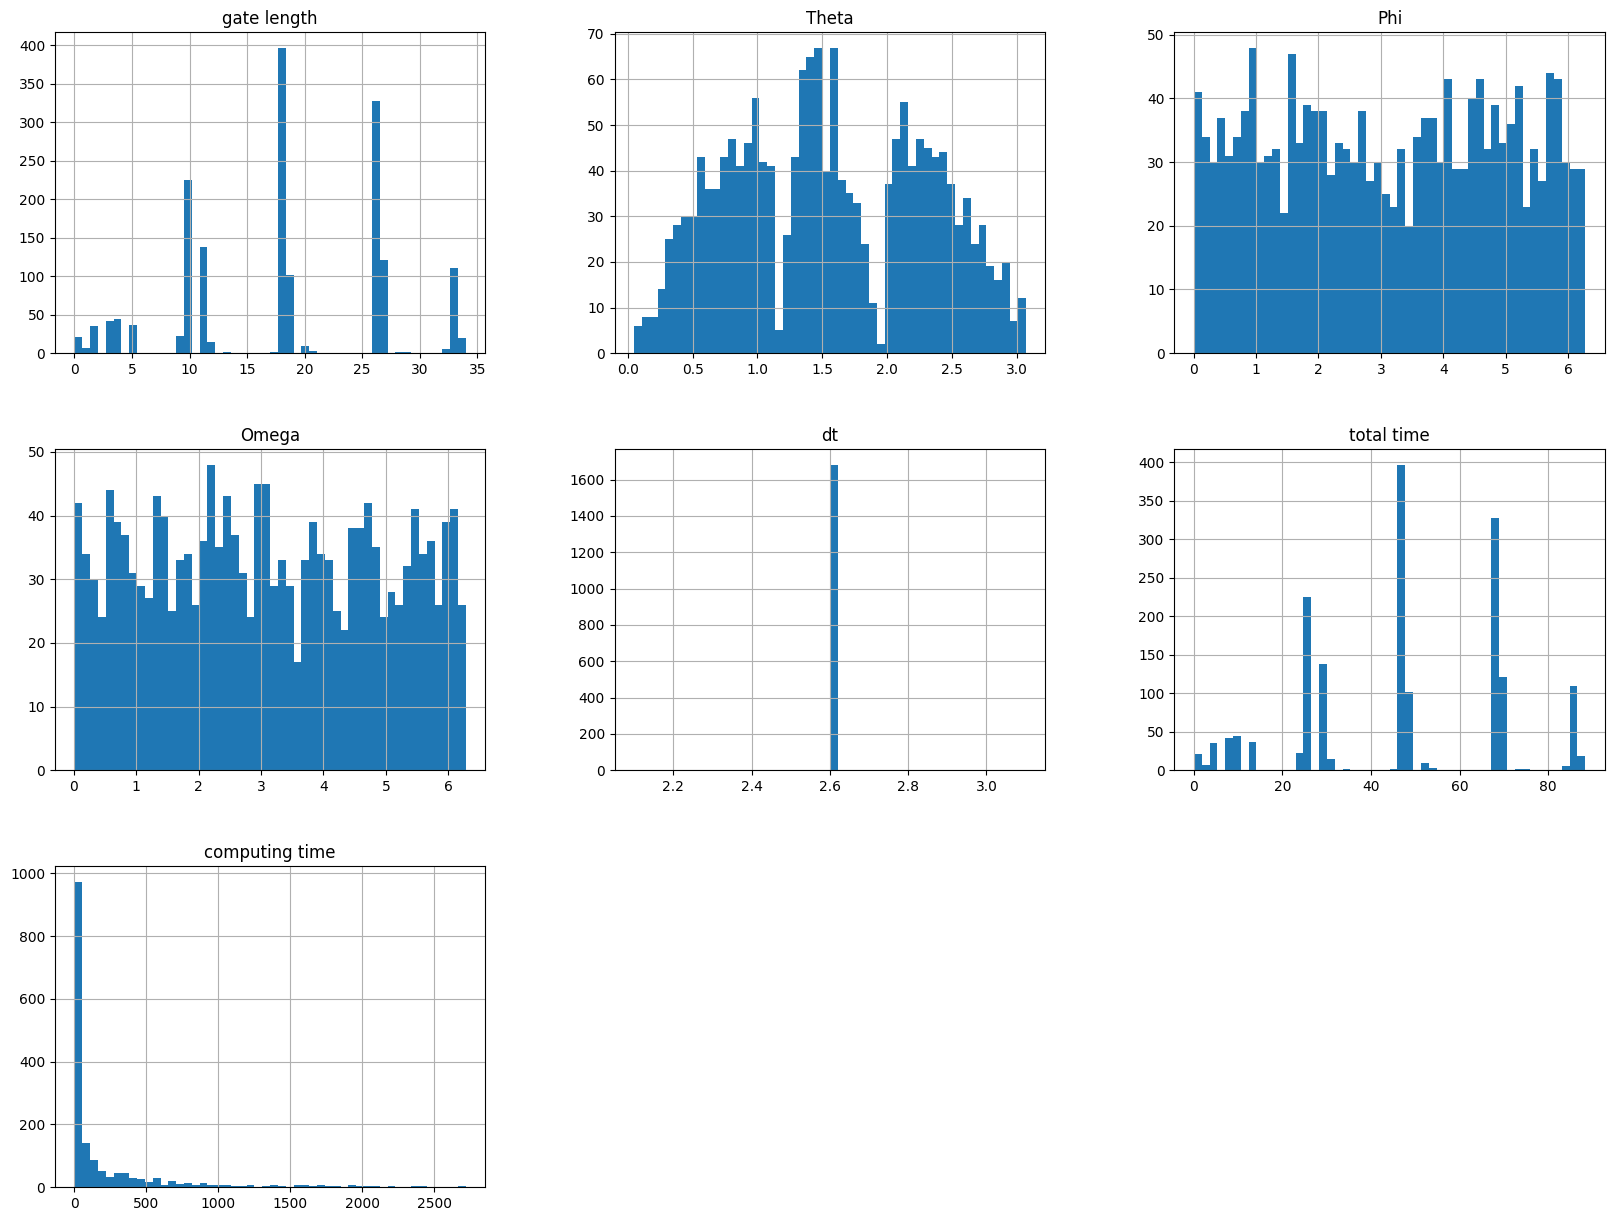

In [ ]:
import matplotlib as plt

%matplotlib inline
df_non_min1.hist(bins=50, figsize=(20,15))

# 히스토그램(주어진 값 범위 수평축, 샘플 수 수직축)